In [71]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# defining our newton's method 
def Newtons_Method(maxIter, tol, f, fprime, x_0):
    
    # counting iterations
    iteration = 1
    # set conditions for loop
    while (iteration < maxIter and abs(f(x_0)) > tol):
        # calculating xn
        global x_1
        x_1 = x_0 - f(x_0)/fprime(x_0)
        # add to counter
        iteration += 1
        if abs(x_1-x_0) < tol:
            break
        else:
            x_0 = x_1
        
    return x_1

In [77]:
def odeEuler(f,y0,initTime,finalT,tStep):
    # creating the t array
    t = np.arange(initTime,finalT+tStep,tStep) 
    # initializing y
    y = np.zeros(len(t))
    # adding first y value
    y[0] = 1
    #looping through values to find next y value
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n])*(t[n+1] - t[n])
    return (t, y)

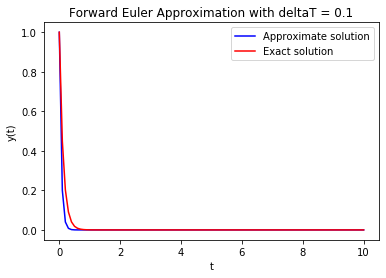

In [78]:
# defining function and variables
lamb = -8
f = lambda y: -8*y
tStep1 = 0.1

# plugging into euler function
t1, y1 = odeEuler(f,1,0, 10, tStep1)

# ploting approximation
plt.plot(t1, y1, 'b', label = 'Approximate solution')

# exact solution for y values
exacty = np.exp(lamb*t1)

# plotting exact solution
plt.plot(t1,exacty, 'r', label = 'Exact solution')

# labeling axes
plt.xlabel('t')
plt.ylabel('y(t)')

# creating legend
plt.legend()

# creating title
plt.title('Forward Euler Approximation with deltaT = 0.1')

# showing graph
plt.show()

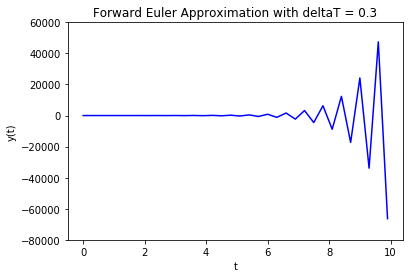

In [89]:
# defining function and variables
lamb = -8
f = lambda y: -8*y
tStep2 = 0.3

# plugging into euler function
t1, y1 = odeEuler(f,1,0, 9.8, tStep2)

# ploting approximation
plt.plot(t1, y1, 'b')

# labeling axes
plt.xlabel('t')
plt.ylabel('y(t)')

# setting y limits 
plt.ylim([-80000, 60000])

# creating title
plt.title('Forward Euler Approximation with deltaT = 0.3')

# showing graph
plt.show()

In [80]:
def Backward_Euler(y0, t0, finalTime, timeStep, F, Fdy):
    # initializing t using inverse timestep
    t = np.arange(t0, finalTime+timeStep, timeStep)
    # initializing y 
    Y = np.zeros(len(t))
    #setting initial y
    Y[0] = y0
    # plugging into backward euler step function
    for i in range(1,len(t)):
        Y[i] = Backward_Euler_Step(Y[i-1],t[i], timeStep, F, Fdy)
        
    return t, Y

def Backward_Euler_Step(Yn, tNext, dt, F, Fdy):
    # setting conditions for looping
    MaxIter = 1000
    tol = 1e-6
    
    # functions defined
    G = lambda y: y-Yn-dt*F(y)
    Gdy = lambda y: 1-dt*Fdy(y)
    
    # finding next y value by plugging into newton's method
    YNext = Newtons_Method(MaxIter, tol, G, Gdy, Yn)
    return YNext

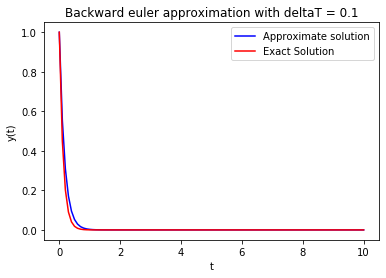

In [81]:
# defining functions and variables 
lamb = -8
timeStep1 = 0.1
f = lambda x: -8*x
fdy = lambda x: -8

# creating two return values and running backward euler
t, y = Backward_Euler(1, 0, 10, timeStep1, f, fdy)

# y values of true function 
exacty = np.exp(lamb*t)

# plotting approximated and exact solutions
plt.plot(t, y, 'b', label = 'Approximate solution')
plt.plot(t,exacty, 'r', label = 'Exact Solution')

# labeling axes
plt.xlabel('t')
plt.ylabel('y(t)')

# showing title and legend
plt.title('Backward euler approximation with deltaT = 0.1')
plt.legend()

# showing graph
plt.show()

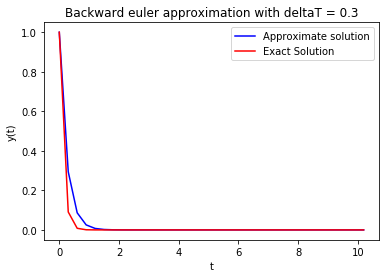

In [82]:
# defining functions again
f = lambda x: -8*x
fdy = lambda x: -8

# defining time step
timeStep1 = 0.3

# creating two return values and running backward euler
t, y = Backward_Euler(1, 0, 10, timeStep1, f, fdy)

# y values of true function 
exacty = np.exp(lamb*t)

# plotting approximated and exact solutions
plt.plot(t, y, 'b', label = 'Approximate solution')
plt.plot(t,exacty, 'r', label = 'Exact Solution')

# labeling axes
plt.xlabel('t')
plt.ylabel('y(t)')

# showing title and legend
plt.title('Backward euler approximation with deltaT = 0.3')
plt.legend()

# showing graph
plt.show()

In [83]:
def stabilityPlot(handle):
    # creating equispaced values within the range of [-5, 5]
    x = np.linspace(-5, 5, 500)
    y = np.linspace(-5, 5, 500)
    
    # creating a meshgrid of x and y values
    [X,Y] = np.meshgrid(x, y)
    
    # initializing a list for stability values
    stab = np.zeros(np.shape(X))
    
    # looping through the length of x and y 
    for i in range(len(x)):
        for j in range(len(y)):
            # imaginary points to plug into our function
            z = X[i][j] + 1j*Y[i][j]
            # defining stability point at z
            stab[i][j] = abs(handle(z))<1
            
    # creating contour plot
    plt.contourf(X,Y,stab,2)  
    
    # making ticks increase by 1
    plt.xticks(np.arange(-5,6,1))
    plt.yticks(np.arange(-5,6,1))
    
    # adjusting to make the stability region a circle
    plt.gca().set_aspect('equal', adjustable='box')

Text(0.5, 1.0, 'Region of stability for forward Euler')

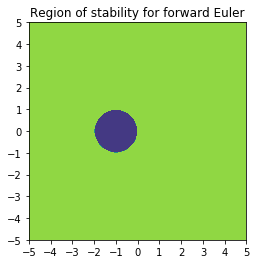

In [84]:
# defining our function for forward euler
f = lambda z: abs(1+z) <= 1

# running our function through stability plot
stabilityPlot(f)

# creating and showing title
plt.title('Region of stability for forward Euler')

Text(0.5, 1.0, 'Region of stability of backward Euler')

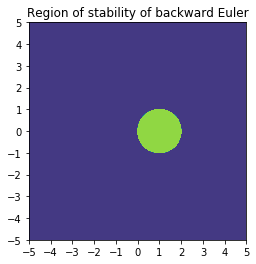

In [85]:
# defining our function for backward euler
f = lambda z: abs(1/(1-z)) <= 1

# running our function through stability plot
stabilityPlot(f)

# creating and showing title
plt.title('Region of stability of backward Euler')

In [86]:
# f = lambda * u
# t = delta t

# yn+1 = yn + t*lambda*(yn + t/2*lambda*yn)
# yn+1 = yn + t*lambda*yn + 1/2*(t^2*lambda^2)*yn
# yn+1 = yn(1 + t*lambda + 1/2*(t*lambda)^2)

# amplification factor = 1 + t*lambda + 1/2*(t*lambda)^2
# z = t*lambda
# amplification factor reduced = 1 + z + 1/2*(z)^2

# function will be abs(1 + z + 1/2*(z)^2) <= 1

Text(0.5, 1.0, 'Region of stability of midpoint')

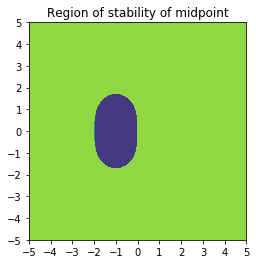

In [87]:
# defining our function
f = lambda z: abs(1+z+(1/2)*(z**2)) <= 1

# running our function through stability plot
stabilityPlot(f)

# creating and showing title
plt.title('Region of stability of midpoint')